#Assignment 1, 2, and 3
Problem: Handling Incomplete Data in Numerical, Time Series and Categorical data by Imputation

Datasets used:
*   Numerical -> Custom Dataset
*   Time-Series -> Daily Temperatures Dataset
*   Categorical -> Custom Binary Classification Dataset

ML models used: Linear Regression (Numerical), KNN Imputation(Categorical)

(Moving Mean, LOCF, Linear Interpolation and other Methods were used for Time Series Data handling)

Performance of the data models are documented below

#Assignment 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Part1 -> Imputation using Linear Regression
#creating dataset
data = {'X': [8, 9, 7, 6, 3, 8, 1, 2, 3, 5],
        'Y': [7, 5, 3, 6, 2, 1, 7, 0, 2, 4],
        'Z': [9, 3, 2, 1, 8, 3, 9, 4, 2, 0]}
df = pd.DataFrame(data)

In [4]:
#creating dataset with missing values
data_missing = {'X': [8, 9, 7, 6, 3, 8, 1, 2, 3, 5],
                'Y': [7, 5, np.nan, 6, 2, np.nan, 7, np.nan, 2, 4],
                'Z': [9, 3, 2, 1, 8, 3, 9, 4, 2, 0]}
df_missing = pd.DataFrame(data_missing)

In [5]:
#df -> X; df_missing -> Y

df_train = df_missing[df_missing['Y'].isnull() == False]
df_test = df_missing[df_missing['Y'].isnull() == True]

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = df_train[df.columns[df.columns != 'Y']]
y = df_train['Y']
lr.fit(x, y)
x_test = df_test[df.columns[df.columns != 'Y']]
y_test = lr.predict(x_test)
y_test

array([4.7256192 , 5.23858359, 3.71439628])

In [7]:
df_test['Y'] = y_test
df_test #imputed dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,Z
2,7,4.725619,2
5,8,5.238584,3
7,2,3.714396,4


In [42]:
y_true = pd.to_numeric(df.loc[[2, 5, 7]]['Y'], downcast = 'float') #original dataset 
y_true

2    3.0
5    1.0
7    0.0
Name: Y, dtype: float32

In [46]:
from sklearn.metrics import mean_squared_error
print("The accuracy score of the model is: ", mean_squared_error(y_true, y_test))

The accuracy score of the model is:  11.580030742590749


#Assignment 2

In [9]:
#Assignment-2: Missing values in Time Series Data
ts_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
ts_data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [10]:
ts_data.dtypes

Date     object
Temp    float64
dtype: object

In [11]:
#converting 'object' to 'DateTime'
ts_data.Date = pd.to_datetime(ts_data.Date)

In [12]:
ts_data.isnull().sum()

Date    0
Temp    0
dtype: int64

In [13]:
print(ts_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB
None


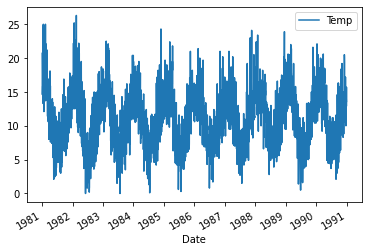

In [14]:
ts_data.plot(x='Date')
plt.show()

In [15]:
temp = ts_data.iloc[:10, : ]
temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


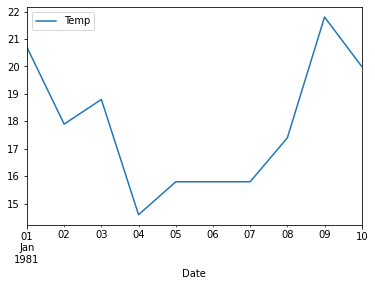

In [16]:
temp.plot(x='Date')
plt.show()

In [17]:
#adding missing values
temp.loc[3, 'Temp'] = np.nan
temp.loc[5, 'Temp'] = np.nan
temp.loc[7, 'Temp'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,NaN
4,1981-01-05,15.8
5,1981-01-06,NaN
6,1981-01-07,15.8
7,1981-01-08,NaN
8,1981-01-09,21.8
9,1981-01-10,20.0


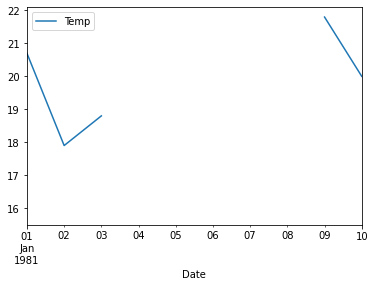

In [19]:
temp.plot(x='Date')
plt.show()

# Testing out various approaches

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


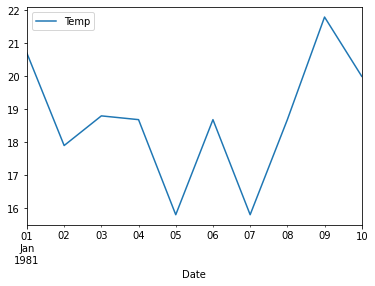

In [20]:
#Mean imputation
temp_mean = temp
temp_mean.Temp = temp_mean['Temp'].fillna(temp_mean.Temp.mean())
temp_mean.plot(x='Date')
plt.show()

In [21]:
#adding missing values
temp.loc[3, 'Temp'] = np.nan
temp.loc[5, 'Temp'] = np.nan
temp.loc[7, 'Temp'] = np.nan
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,NaN
4,1981-01-05,15.8
5,1981-01-06,NaN
6,1981-01-07,15.8
7,1981-01-08,NaN
8,1981-01-09,21.8
9,1981-01-10,20.0


In [22]:
#Moving Mean method
temp_sma = temp
temp_sma.Temp = temp_sma['Temp'].rolling(3, center=True, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


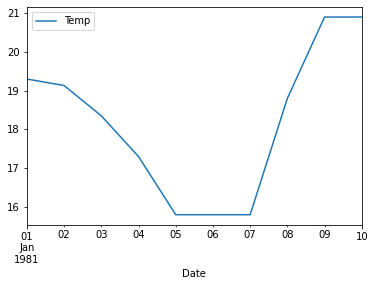

In [23]:
temp_sma.plot(x='Date')
plt.show()

In [24]:
#adding missing values
temp.loc[3, 'Temp'] = np.nan
temp.loc[5, 'Temp'] = np.nan
temp.loc[7, 'Temp'] = np.nan
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Temp
0,1981-01-01,19.300000
1,1981-01-02,19.133333
2,1981-01-03,18.350000
3,1981-01-04,NaN
4,1981-01-05,15.800000
5,1981-01-06,NaN
6,1981-01-07,15.800000
7,1981-01-08,NaN
8,1981-01-09,20.900000
9,1981-01-10,20.900000


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


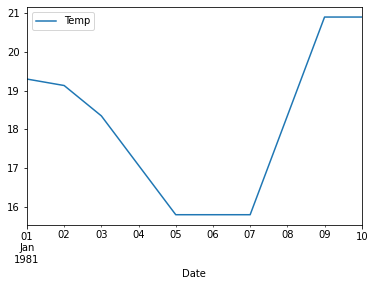

,Date,Temp
0,1981-01-01,19.300000
1,1981-01-02,19.133333
2,1981-01-03,18.350000
3,1981-01-04,17.075000
4,1981-01-05,15.800000
5,1981-01-06,15.800000
6,1981-01-07,15.800000
7,1981-01-08,18.350000
8,1981-01-09,20.900000
9,1981-01-10,20.900000


In [25]:
#Linear Interpolation Method
temp_li = temp
temp_li.Temp = temp_li['Temp'].interpolate(method='linear')
temp_li.plot(x='Date')
plt.show()
temp

In [26]:
#adding missing values
temp.loc[3, 'Temp'] = np.nan
temp.loc[5, 'Temp'] = np.nan
temp.loc[7, 'Temp'] = np.nan
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Temp
0,1981-01-01,19.300000
1,1981-01-02,19.133333
2,1981-01-03,18.350000
3,1981-01-04,NaN
4,1981-01-05,15.800000
5,1981-01-06,NaN
6,1981-01-07,15.800000
7,1981-01-08,NaN
8,1981-01-09,20.900000
9,1981-01-10,20.900000


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


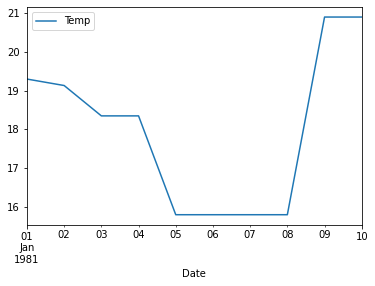

In [27]:
#Last Observation Carried Forward(LOCF) Method

temp_locf = temp
temp_locf.Temp = temp_locf['Temp'].fillna(method='ffill')
temp_locf.plot(x='Date')
plt.show()

In [28]:
#adding missing values
temp.loc[3, 'Temp'] = np.nan
temp.loc[5, 'Temp'] = np.nan
temp.loc[7, 'Temp'] = np.nan
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Temp
0,1981-01-01,19.300000
1,1981-01-02,19.133333
2,1981-01-03,18.350000
3,1981-01-04,NaN
4,1981-01-05,15.800000
5,1981-01-06,NaN
6,1981-01-07,15.800000
7,1981-01-08,NaN
8,1981-01-09,20.900000
9,1981-01-10,20.900000


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


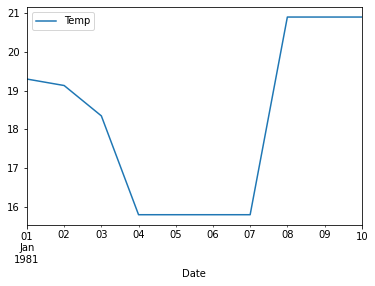

In [29]:
#Last Observation Carried Backward(LOCB) Method

temp_locb = temp
temp_locb.Temp = temp_locb['Temp'].fillna(method='bfill')
temp_locf.plot(x='Date')
plt.show()

From the given plots, the imputed data was not ideal for mean, median, mode imputation but worked well enough for Linear interpolation, Moving Mean Average, LOCF and LOCB (The tested data had smaller dimensions and LOCF and LOCB may get effected in larger dimensions of Time Series Data.)

The above approaches are for Univariate Time Series Data and differ significantly for multivariate Time Series Data.

# Incomplete Data Handling for Categorical Data
## Assignment 3

Given to us is a custom data set of 10*5 dimensions with one of the columns being categorical in nature. 

In [30]:
#Creating the dataset
dataset = {'S.No' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           'Name' : ['Al', 'Bl', 'Cl', 'Dl', 'El', 'Fl', 'Gl', 'Hl', 'Il', 'Jl'],
           'Age' : [18, 19, 46, 23, 20, 25, 32, 30, 29, 22],
           'Exp' : [1, 4, 5, 2, 3, 1, 2, 3, 5, 4],
           'Gender': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'M']}

data = pd.DataFrame(dataset)        
data

,S.No,Name,Age,Exp,Gender
0,1,Al,18,1,M
1,2,Bl,19,4,F
2,3,Cl,46,5,F
3,4,Dl,23,2,M
4,5,El,20,3,F
5,6,Fl,25,1,M
6,7,Gl,32,2,M
7,8,Hl,30,3,F
8,9,Il,29,5,F
9,10,Jl,22,4,M


In [31]:
#Taking Gender as the Categorical feature of interest

dataset_missing = {'S.No' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           'Name' : ['Al', 'Bl', 'Cl', 'Dl', 'El', 'Fl', 'Gl', 'Hl', 'Il', 'Jl'],
           'Age' : [18, 19, 46, 23, 20, 25, 32, 30, 29, 22],
           'Exp' : [1, 4, 5, 2, 3, 1, 2, 3, 5, 4],
           'Gender': ['M', 'F', np.nan, 'M', 'F', np.nan, np.nan, 'F', 'F', 'M']}

data_missing = pd.DataFrame(dataset_missing)
data_missing

,S.No,Name,Age,Exp,Gender
0,1,Al,18,1,M
1,2,Bl,19,4,F
2,3,Cl,46,5,NaN
3,4,Dl,23,2,M
4,5,El,20,3,F
5,6,Fl,25,1,NaN
6,7,Gl,32,2,NaN
7,8,Hl,30,3,F
8,9,Il,29,5,F
9,10,Jl,22,4,M


The method we are going to use here is KNN-Algorithm for imputation
Because it is faster and effective for data sets of smaller dimensions(as over here) and it is a lazy learner algo, meaning it doesnt require any training period. KNN-imputation is comparitively very precise as well

In [32]:
#firstly encoing the data

data_missing['Gendermap'] = data_missing.Gender.map({'F' : 1, 'M' : 0})
data_missing_mapped= data_missing[data_missing.columns[data_missing.columns != 'Gender']]
data_missing_mapped

,S.No,Name,Age,Exp,Gendermap
0,1,Al,18,1,0.0
1,2,Bl,19,4,1.0
2,3,Cl,46,5,NaN
3,4,Dl,23,2,0.0
4,5,El,20,3,1.0
5,6,Fl,25,1,NaN
6,7,Gl,32,2,NaN
7,8,Hl,30,3,1.0
8,9,Il,29,5,1.0
9,10,Jl,22,4,0.0


In [33]:


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 1)
data_filled = imputer.fit_transform(data_missing_mapped[['S.No', 'Age', 'Exp', 'Gendermap']])

In [34]:
data_filled

array([[ 1., 18.,  1.,  0.],
       [ 2., 19.,  4.,  1.],
       [ 3., 46.,  5.,  1.],
       [ 4., 23.,  2.,  0.],
       [ 5., 20.,  3.,  1.],
       [ 6., 25.,  1.,  0.],
       [ 7., 32.,  2.,  1.],
       [ 8., 30.,  3.,  1.],
       [ 9., 29.,  5.,  1.],
       [10., 22.,  4.,  0.]])

In [35]:
data

,S.No,Name,Age,Exp,Gender
0,1,Al,18,1,M
1,2,Bl,19,4,F
2,3,Cl,46,5,F
3,4,Dl,23,2,M
4,5,El,20,3,F
5,6,Fl,25,1,M
6,7,Gl,32,2,M
7,8,Hl,30,3,F
8,9,Il,29,5,F
9,10,Jl,22,4,M


Comparing the filled data with our original dataset, we can see that the three missing values (S.No's 2, 6 and 7) have been imputed with only the S.No 2 and 6 being correctly predicted as F(1) and M(0) respectively.

S.No 7 has been incorrectly predicted (Reason: S.No 7 might be an outlier to which KNN is very sensitive of)